Estimated dose rate at the detector: 0.60 MeV/m^2/s


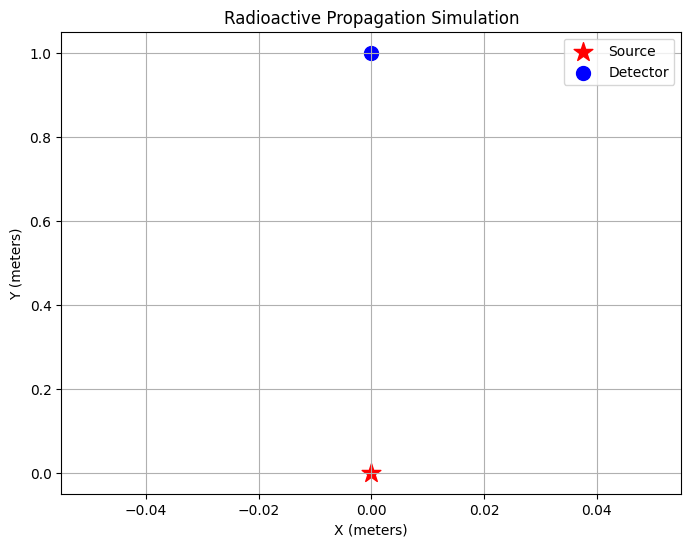

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Simulation Parameters
num_particles = 100000  # Number of simulated particles
source_activity = 100  # Activity of the source (Bq)
detector_distance = 1.0  # Distance from source to detector (meters)
detector_area = 0.01  # Area of the detector (square meters)
energy_per_particle = 1.0  # Energy per particle (MeV)

# Toy Geometry (Point Source)
source_position = np.array([0, 0, 0])  # Source at the origin

# Radiation Properties (Example: Gamma Rays)
attenuation_coefficient = 0.1  # Linear attenuation coefficient (1/meter)

# Monte Carlo Simulation
detected_particles = 0
total_energy_deposited = 0

for _ in range(num_particles):
    # Random Direction
    phi = random.uniform(0, 2 * np.pi)
    theta = np.arccos(random.uniform(-1, 1))
    direction = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])

    # Distance to Interaction
    distance_to_interaction = -np.log(random.random()) / attenuation_coefficient
    interaction_point = source_position + distance_to_interaction * direction

    # Check if Particle Hits Detector
    if np.linalg.norm(interaction_point[:2]) <= np.sqrt(detector_area / np.pi) and interaction_point[2] >= detector_distance:
        detected_particles += 1
        total_energy_deposited += energy_per_particle

# Dose Calculation
dose_rate = (total_energy_deposited / num_particles) * source_activity / detector_area
print(f"Estimated dose rate at the detector: {dose_rate:.2f} MeV/m^2/s")

# Visualization (Optional)
plt.figure(figsize=(8, 6))
plt.scatter(source_position[0], source_position[1], color='red', marker='*', s=200, label='Source')
plt.scatter(0, detector_distance, color='blue', marker='o', s=100, label='Detector')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('Radioactive Propagation Simulation')
plt.legend()
plt.grid(True)
plt.show()
